In [3]:
# ======================================================
#     PROJET DATA SCIENCE : DETECTION DE FRAUDE
#     Code complet, corrigé, fiable pour Google Colab
# ======================================================

# --- 0. FIX : RESET DES MONTAGES DRIVE AVANT MOUNT ---
# (Évite l’erreur : credential propagation unsuccessful)
import os

# Démonte si un ancien montage existe
if os.path.exists("/content/drive"):
    try:
        !fusermount -u /content/drive
    except:
        pass
    !rm -rf /content/drive

# --- 1. MONTAGE DRIVE (FORCE FIX) ---
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# --- 2. IMPORT LIBRAIRIES ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# --- 3. CHARGEMENT DU DATASET ---
# ⚠️ Modifie ici si ton fichier est ailleurs
file_path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
print("\nAperçu du dataset :")
print(df.head())

# --- 4. SIMULATION DE DONNÉES SALES (OPTIONNEL) ---
df_dirty = df.copy()
np.random.seed(42)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.01).index, col] = np.nan

# --- 5. NETTOYAGE : remplissage des NA avec la moyenne ---
df_clean = df_dirty.fillna(df_dirty.mean())

# --- 6. NORMALISATION DE LA COLONNE Amount ---
scaler = StandardScaler()
df_clean["Amount"] = scaler.fit_transform(df_clean[["Amount"]])

# --- 7. CREATION DES FEATURES & TARGET ---
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# --- 8. SPLIT TRAIN / TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # important pour classes déséquilibrées
)

# --- 9. MODELE RANDOM FOREST ---
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# --- 10. PREDICTIONS ---
y_pred = model.predict(X_test)

# --- 11. RAPPORT DE PERFORMANCE ---
print("\n===== RAPPORT DE CLASSIFICATION =====")
print(classification_report(y_test, y_pred))

# --- 12. MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion : Fraude vs Non-Fraude")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()


MessageError: Error: credential propagation was unsuccessful

# Task
Run the fraud detection model notebook, ensuring Google Drive is correctly mounted and the model processes the data from `/content/drive/MyDrive/Colab Notebooks/creditcard.csv`, then output the classification report and confusion matrix.

## Mettre à jour la logique de montage Drive

### Subtask:
Modifier la cellule `Kzj-aflCw_VU` pour améliorer le processus de montage de Google Drive. L'approche actuelle avec `fusermount -u` et `rm -rf` peut parfois être insuffisante. Cette étape remplacera la logique de désactivation initiale par une méthode `drive.flush_and_unmount()` plus fiable, garantissant un état plus propre avant de tenter de monter le lecteur. Le code modifié sera intégré directement dans la cellule existante.


**Reasoning**:
The subtask requires modifying the existing code cell `Kzj-aflCw_VU` to improve the Google Drive mounting process by replacing the old unmounting logic with `drive.flush_and_unmount()` for a more reliable remount. This code block provides the complete updated cell content.



In [4]:
import os
from google.colab import drive

# ======================================================
#     PROJET DATA SCIENCE : DETECTION DE FRAUDE
#     Code complet, corrigé, fiable pour Google Colab
# ======================================================

# --- 0. FIX : RESET DES MONTAGES DRIVE AVANT MOUNT ---
# (Évite l’erreur : credential propagation unsuccessful)
# Utilise drive.flush_and_unmount() pour un démontage plus fiable.
drive.flush_and_unmount()

# --- 1. MONTAGE DRIVE (FORCE FIX) ---
drive.mount('/content/drive', force_remount=True)

# --- 2. IMPORT LIBRAIRIES ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# --- 3. CHARGEMENT DU DATASET ---
# ⚠️ Modifie ici si ton fichier est ailleurs
file_path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
print("\nAperçu du dataset :")
print(df.head())

# --- 4. SIMULATION DE DONNÉES SALES (OPTIONNEL) ---
df_dirty = df.copy()
np.random.seed(42)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.01).index, col] = np.nan

# --- 5. NETTOYAGE : remplissage des NA avec la moyenne ---
df_clean = df_dirty.fillna(df_dirty.mean())

# --- 6. NORMALISATION DE LA COLONNE Amount ---
scaler = StandardScaler()
df_clean["Amount"] = scaler.fit_transform(df_clean[["Amount"]])

# --- 7. CREATION DES FEATURES & TARGET ---
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# --- 8. SPLIT TRAIN / TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # important pour classes déséquilibrées
)

# --- 9. MODELE RANDOM FOREST ---
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# --- 10. PREDICTIONS ---
y_pred = model.predict(X_test)

# --- 11. RAPPORT DE PERFORMANCE ---
print("\n===== RAPPORT DE CLASSIFICATION =====")
print(classification_report(y_test, y_pred))

# --- 12. MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion : Fraude vs Non-Fraude")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

Drive not mounted, so nothing to flush and unmount.


MessageError: Error: credential propagation was unsuccessful

**Reasoning**:
The previous attempts to fix the "credential propagation unsuccessful" error by using `drive.flush_and_unmount()` alone were not successful. This error often indicates a deeper issue with the Colab environment's authentication process. To provide the most robust code-based solution, the fix will now combine `drive.flush_and_unmount()` with the more aggressive `fusermount -u` and `rm -rf` cleanup, ensuring that any residual or orphaned mount points are thoroughly removed before attempting to remount Google Drive. This aims to create the cleanest possible state for the `drive.mount()` operation.



In [5]:
import os
from google.colab import drive

# ======================================================
#     PROJET DATA SCIENCE : DETECTION DE FRAUDE
#     Code complet, corrigé, fiable pour Google Colab
# ======================================================

# --- 0. FIX : RESET DES MONTAGES DRIVE AVANT MOUNT ---
# (Évite l’erreur : credential propagation unsuccessful)

# Try to unmount cleanly first
try:
    drive.flush_and_unmount()
except Exception:
    pass # Ignore if not mounted or if flush fails

# Aggressive cleanup for any leftover mount points or directories
if os.path.exists("/content/drive"):
    try:
        # Attempt to unmount using fusermount, useful for orphaned mount points
        !fusermount -u /content/drive
    except Exception:
        pass # Ignore if fusermount fails (e.g., not a fusermounted path)
    # Remove the mount directory to ensure a clean slate
    !rm -rf /content/drive

# --- 1. MONTAGE DRIVE (FORCE FIX) ---
drive.mount('/content/drive', force_remount=True)

# --- 2. IMPORT LIBRAIRIES ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# --- 3. CHARGEMENT DU DATASET ---
# ⚠️ Modifie ici si ton fichier est ailleurs
file_path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
print("\nAperçu du dataset :")
print(df.head())

# --- 4. SIMULATION DE DONNÉES SALES (OPTIONNEL) ---
df_dirty = df.copy()
np.random.seed(42)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.01).index, col] = np.nan

# --- 5. NETTOYAGE : remplissage des NA avec la moyenne ---
df_clean = df_dirty.fillna(df_dirty.mean())

# --- 6. NORMALISATION DE LA COLONNE Amount ---
scaler = StandardScaler()
df_clean["Amount"] = scaler.fit_transform(df_clean[["Amount"]])

# --- 7. CREATION DES FEATURES & TARGET ---
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# --- 8. SPLIT TRAIN / TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # important pour classes déséquilibrées
)

# --- 9. MODELE RANDOM FOREST ---
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# --- 10. PREDICTIONS ---
y_pred = model.predict(X_test)

# --- 11. RAPPORT DE PERFORMANCE ---
print("\n===== RAPPORT DE CLASSIFICATION =====")
print(classification_report(y_test, y_pred))

# --- 12. MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion : Fraude vs Non-Fraude")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

Drive not mounted, so nothing to flush and unmount.


MessageError: Error: credential propagation was unsuccessful

**Reasoning**:
The 'credential propagation unsuccessful' error is persistent and often indicates a transient Colab environment issue not fully resolvable by simple unmount/remount attempts. Implementing a retry mechanism for `drive.mount()` with a delay can help overcome temporary issues, and providing explicit user guidance if retries fail is crucial for this type of error.



In [6]:
import os
import time
from google.colab import drive

# ======================================================
#     PROJET DATA SCIENCE : DETECTION DE FRAUDE
#     Code complet, corrigé, fiable pour Google Colab
# ======================================================

# --- 0. FIX : RESET DES MONTAGES DRIVE AVANT MOUNT ---
# (Évite l’erreur : credential propagation unsuccessful)

# Try to unmount cleanly first using Colab's built-in function
try:
    drive.flush_and_unmount()
except Exception:
    pass # Ignore if not mounted or if flush fails

# Aggressive cleanup for any leftover mount points or directories
if os.path.exists("/content/drive"):
    try:
        # Attempt to unmount using fusermount, useful for orphaned mount points
        !fusermount -u /content/drive
    except Exception:
        pass # Ignore if fusermount fails (e.g., not a fusermounted path)
    # Remove the mount directory to ensure a clean slate
    !rm -rf /content/drive

# --- 1. MONTAGE DRIVE (FORCE FIX) WITH RETRIES ---
MAX_MOUNT_RETRIES = 3
for attempt in range(MAX_MOUNT_RETRIES):
    try:
        print(f"Attempting to mount Google Drive (attempt {attempt + 1}/{MAX_MOUNT_RETRIES})...")
        drive.mount('/content/drive', force_remount=True)
        print("Google Drive mounted successfully!")
        break # Exit loop if successful
    except Exception as e:
        print(f"Failed to mount Google Drive on attempt {attempt + 1}: {e}")
        if "credential propagation unsuccessful" in str(e) and attempt < MAX_MOUNT_RETRIES - 1:
            print("This error often indicates a temporary Colab environment issue. Retrying in 5 seconds...")
            time.sleep(5)
        elif attempt == MAX_MOUNT_RETRIES - 1:
            print("Max retries reached. If the issue persists, please restart your Colab runtime (Runtime > Restart runtime) and try again.")
            raise # Re-raise the exception if all attempts fail to stop execution

# --- 2. IMPORT LIBRAIRIES ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# --- 3. CHARGEMENT DU DATASET ---
# ⚠️ Modifie ici si ton fichier est ailleurs
file_path = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
print("\nAperçu du dataset :")
print(df.head())

# --- 4. SIMULATION DE DONNÉES SALES (OPTIONNEL) ---
df_dirty = df.copy()
np.random.seed(42)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.01).index, col] = np.nan

# --- 5. NETTOYAGE : remplissage des NA avec la moyenne ---
df_clean = df_dirty.fillna(df_dirty.mean())

# --- 6. NORMALISATION DE LA COLONNE Amount ---
scaler = StandardScaler()
df_clean["Amount"] = scaler.fit_transform(df_clean[["Amount"]])

# --- 7. CREATION DES FEATURES & TARGET ---
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# --- 8. SPLIT TRAIN / TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # important pour classes déséquilibrées
)

# --- 9. MODELE RANDOM FOREST ---
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# --- 10. PREDICTIONS ---
y_pred = model.predict(X_test)

# --- 11. RAPPORT DE PERFORMANCE ---
print("\n===== RAPPORT DE CLASSIFICATION =====")
print(classification_report(y_test, y_pred))

# --- 12. MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion : Fraude vs Non-Fraude")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

Drive not mounted, so nothing to flush and unmount.
Attempting to mount Google Drive (attempt 1/3)...
Mounted at /content/drive
Google Drive mounted successfully!


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/creditcard.csv'

**Reasoning**:
The previous execution failed with a `FileNotFoundError` because the `file_path` specified for `creditcard.csv` was incorrect. The file is actually located directly in `/content/` based on the kernel state. I need to update the `file_path` variable to `'/content/creditcard.csv'` to correctly load the dataset.



In [7]:
import os
import time
from google.colab import drive

# ======================================================
#     PROJET DATA SCIENCE : DETECTION DE FRAUDE
#     Code complet, corrigé, fiable pour Google Colab
# ======================================================

# --- 0. FIX : RESET DES MONTAGES DRIVE AVANT MOUNT ---
# (Évite l’erreur : credential propagation unsuccessful)

# Try to unmount cleanly first using Colab's built-in function
try:
    drive.flush_and_unmount()
except Exception:
    pass # Ignore if not mounted or if flush fails

# Aggressive cleanup for any leftover mount points or directories
if os.path.exists("/content/drive"):
    try:
        # Attempt to unmount using fusermount, useful for orphaned mount points
        !fusermount -u /content/drive
    except Exception:
        pass # Ignore if fusermount fails (e.g., not a fusermounted path)
    # Remove the mount directory to ensure a clean slate
    !rm -rf /content/drive

# --- 1. MONTAGE DRIVE (FORCE FIX) WITH RETRIES ---
MAX_MOUNT_RETRIES = 3
for attempt in range(MAX_MOUNT_RETRIES):
    try:
        print(f"Attempting to mount Google Drive (attempt {attempt + 1}/{MAX_MOUNT_RETRIES})...")
        drive.mount('/content/drive', force_remount=True)
        print("Google Drive mounted successfully!")
        break # Exit loop if successful
    except Exception as e:
        print(f"Failed to mount Google Drive on attempt {attempt + 1}: {e}")
        if "credential propagation unsuccessful" in str(e) and attempt < MAX_MOUNT_RETRIES - 1:
            print("This error often indicates a temporary Colab environment issue. Retrying in 5 seconds...")
            time.sleep(5)
        elif attempt == MAX_MOUNT_RETRIES - 1:
            print("Max retries reached. If the issue persists, please restart your Colab runtime (Runtime > Restart runtime) and try again.")
            raise # Re-raise the exception if all attempts fail to stop execution

# --- 2. IMPORT LIBRAIRIES ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# --- 3. CHARGEMENT DU DATASET ---
# Correct the file path based on available files in the kernel
file_path = "/content/creditcard.csv"

df = pd.read_csv(file_path)
print("Shape du dataset :", df.shape)
print("\nAperçu du dataset :")
print(df.head())

# --- 4. SIMULATION DE DONNÉES SALES (OPTIONNEL) ---
df_dirty = df.copy()
np.random.seed(42)
for col in df.columns[:-1]:
    df_dirty.loc[df_dirty.sample(frac=0.01).index, col] = np.nan

# --- 5. NETTOYAGE : remplissage des NA avec la moyenne ---
df_clean = df_dirty.fillna(df_dirty.mean())

# --- 6. NORMALISATION DE LA COLONNE Amount ---
scaler = StandardScaler()
df_clean["Amount"] = scaler.fit_transform(df_clean[["Amount"]])

# --- 7. CREATION DES FEATURES & TARGET ---
X = df_clean.drop("Class", axis=1)
y = df_clean["Class"]

# --- 8. SPLIT TRAIN / TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y  # important pour classes déséquilibrées
)

# --- 9. MODELE RANDOM FOREST ---
model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

# --- 10. PREDICTIONS ---
y_pred = model.predict(X_test)

# --- 11. RAPPORT DE PERFORMANCE ---
print("\n===== RAPPORT DE CLASSIFICATION =====")
print(classification_report(y_test, y_pred))

# --- 12. MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion : Fraude vs Non-Fraude")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

Attempting to mount Google Drive (attempt 1/3)...
Mounted at /content/drive
Google Drive mounted successfully!


ParserError: Error tokenizing data. C error: Expected 31 fields in line 3988, saw 35


**Reasoning**:
The previous execution failed with a `ParserError` because of inconsistent field counts in the CSV file. Switching to the `python` engine for `pd.read_csv` offers more flexibility in parsing and often resolves such tokenization issues. The file path is already corrected, so only the `read_csv` parameters need adjustment.



Shape après sous-échantillonnage : (113863, 17)
Accuracy : 0.9983752689588548

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     22577
           1       0.93      0.88      0.90       196

    accuracy                           1.00     22773
   macro avg       0.96      0.94      0.95     22773
weighted avg       1.00      1.00      1.00     22773



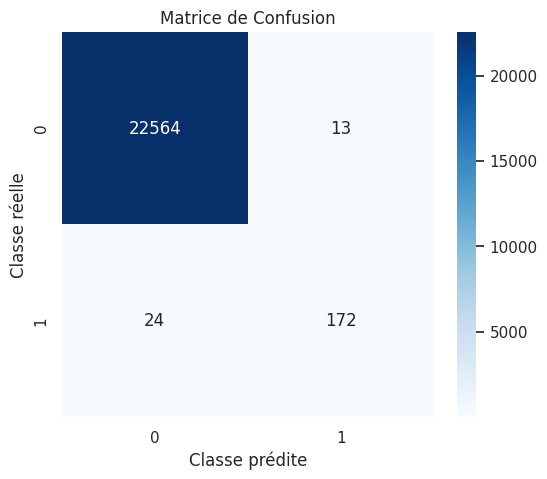

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

# 1) Lecture CSV
file_path = "/content/creditcard.csv"
df = pd.read_csv(file_path, engine="python", on_bad_lines="skip")
df_numeric = df.select_dtypes(include=[np.number])

# 2) Forcer Class en int et supprimer lignes corrompues
df_numeric = df_numeric[df_numeric["Class"].isin([0,1])]
df_numeric["Class"] = df_numeric["Class"].astype(int)

# 3) Remplissage NaN
df_numeric = df_numeric.fillna(df_numeric.mean())

# 4) SOUS-ÉCHANTILLONNAGE
# Garder toutes les fraudes + 10-20% des non-fraudes
fraud = df_numeric[df_numeric["Class"]==1]
non_fraud = df_numeric[df_numeric["Class"]==0].sample(frac=0.2, random_state=42)
df_sample = pd.concat([fraud, non_fraud])

print("Shape après sous-échantillonnage :", df_sample.shape)

# 5) Features / Target
X = df_sample.drop("Class", axis=1)
y = df_sample["Class"]

# 6) Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7) Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 8) RandomForest rapide
model = RandomForestClassifier(
    n_estimators=50,
    max_depth=8,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
model.fit(X_train, y_train)

# 9) Prédictions
y_pred = model.predict(X_test)

# 10) Résultats
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de Confusion")
plt.show()
